In [ ]:
오늘은 naive bayes 모델 코드로 구현해볼 것 -> 텍스트에서는 씀
텍스트의 특징이랑 나이브 베이즈 모델에서 얘기하는 naive assumption 이랑 비슷해서 씀.
naive = 순진한 => 주어진 class에 대해서 모두 conditionally independent 하다고 가정.

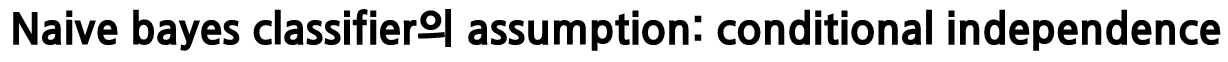

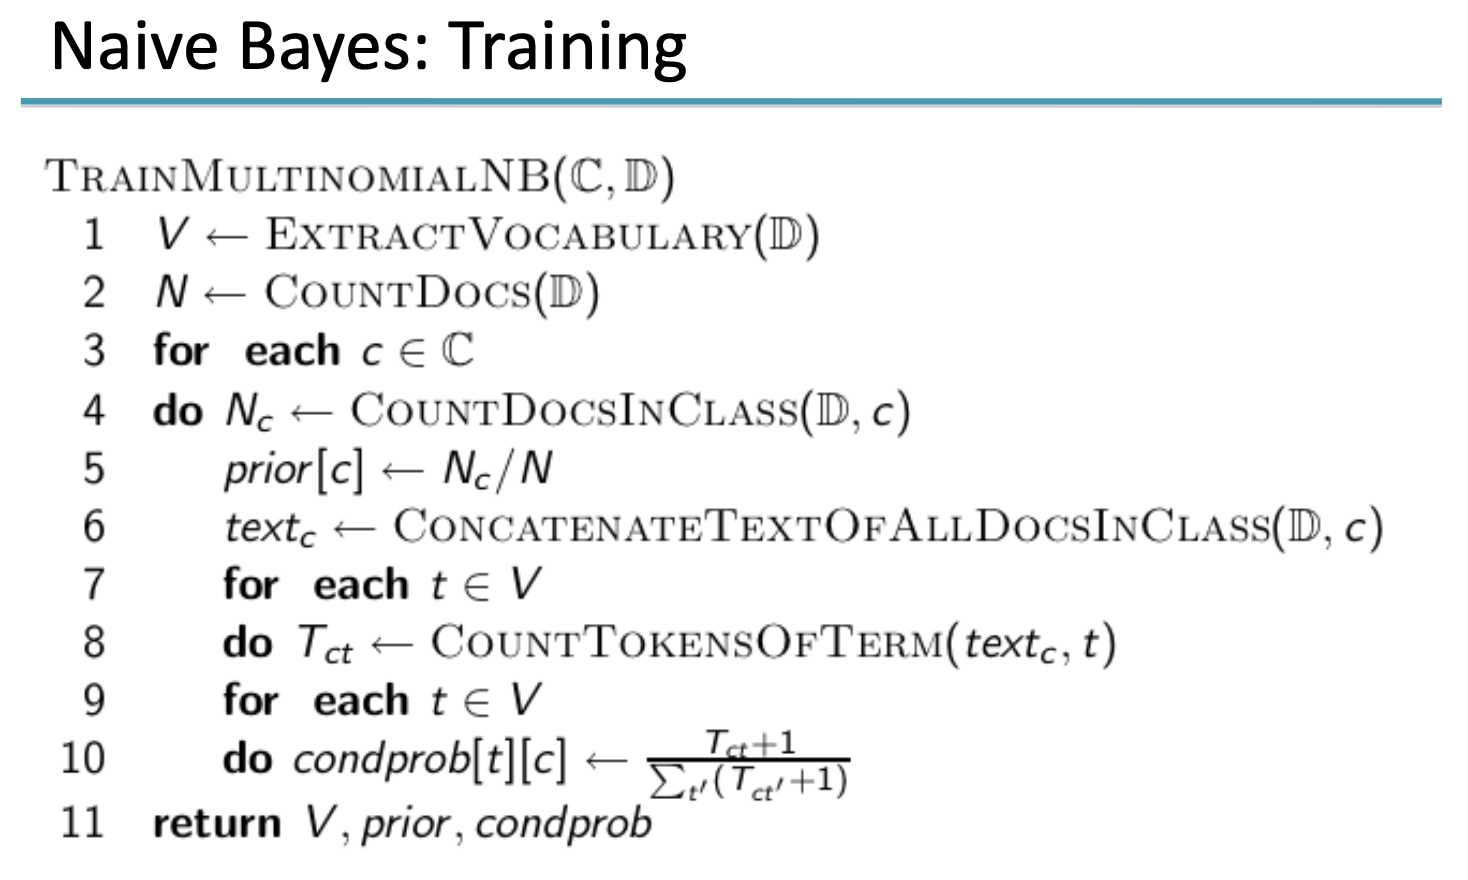

In [ ]:
C 는 클래스, D 는 document 집합
넘파이를 가지고 구현

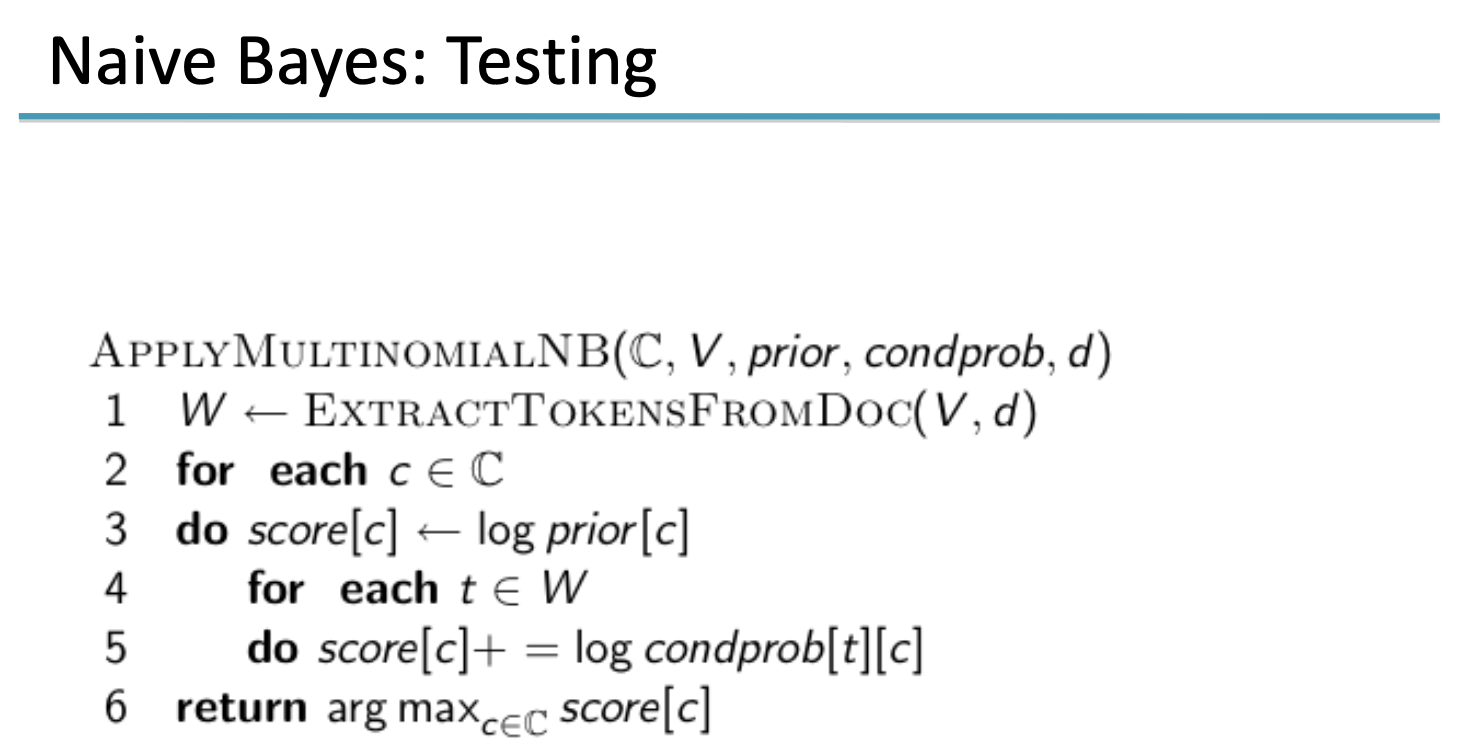

In [ ]:
정확한 값보다 누가 더 큰지 비교할 수 있으면 됨.

In [ ]:
우리는 최대한 보기 좋은 형태로, 계산이 눈으로 따라가도록 만드는 것이 목적. 그대로 구현해보자

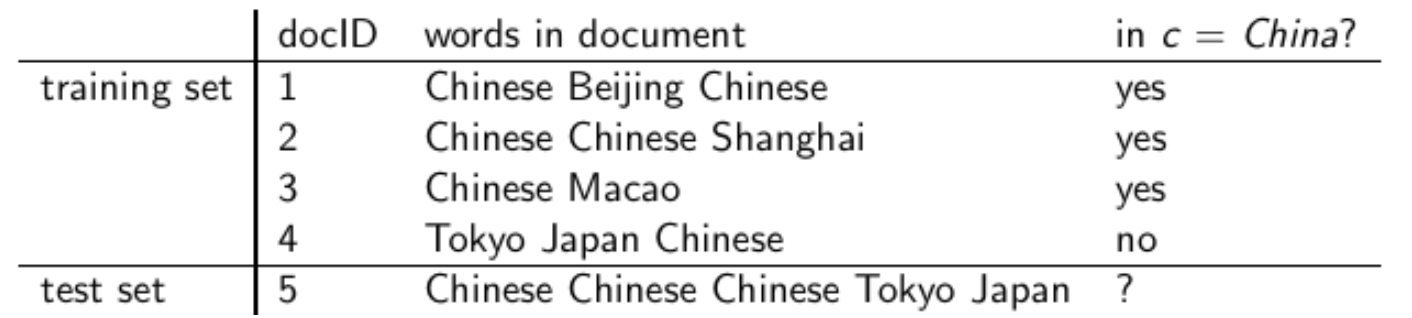

In [1]:
C = ['yes', 'no']
D = [{'docID':1, 'document':'Chinese Beijing Chinese', 'class':'yes'},
    {'docID':2, 'document':'Chinese Chinese Shanghai', 'class':'yes'},
    {'docID':3, 'document':'Chinese Macao', 'class':'yes'},
    {'docID':4, 'document':'Tokyo Japan Chinese', 'class':'no'},
    {'docID':5, 'document':'Chinese Chinese Chinese Tokyo Japan', 'class':'no'}]

In [2]:
def training(C, D):
    V = [d['document'].lower().split() for d in D]
    N = len(D)
    return V, N
training(C,D[:-1])

([['chinese', 'beijing', 'chinese'],
  ['chinese', 'chinese', 'shanghai'],
  ['chinese', 'macao'],
  ['tokyo', 'japan', 'chinese']],
 4)

In [4]:
def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    return V, N
training(C,D[:-1])

(['beijing', 'shanghai', 'macao', 'chinese', 'japan', 'tokyo'], 4)

In [7]:
def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
    return V, N, Prior
training(C,D[:-1])

(['beijing', 'shanghai', 'macao', 'chinese', 'japan', 'tokyo'],
 4,
 [0.75, 0.25])

In [8]:
from collections import Counter

def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
        textc = Counter(' '.join([d['document'].lower() for d in D if d['class'] == c]).split())
        
        for t in V:
            tct = textc[t]
        
    return V, N, Prior
training(C,D[:-1])

(['beijing', 'shanghai', 'macao', 'chinese', 'japan', 'tokyo'],
 4,
 [0.75, 0.25])

In [10]:
from collections import Counter

def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    CondProb = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
        textc = Counter(' '.join([d['document'].lower() for d in D if d['class'] == c]).split())
        
        condprob = dict()
        for t in V:
            tct = textc[t]
            condprob[t] = (tct + 1)/(sum(textc.values()) + len(V))  # 분자. add 1 smoothing
            # 단어별로 해당 클래스의 값이 기록됨
            
        CondProb.append(condprob)
        
    return V, N, Prior, CondProb
training(C,D[:-1])

(['beijing', 'shanghai', 'macao', 'chinese', 'japan', 'tokyo'],
 4,
 [0.75, 0.25],
 [{'beijing': 0.14285714285714285,
   'shanghai': 0.14285714285714285,
   'macao': 0.14285714285714285,
   'chinese': 0.42857142857142855,
   'japan': 0.07142857142857142,
   'tokyo': 0.07142857142857142},
  {'beijing': 0.1111111111111111,
   'shanghai': 0.1111111111111111,
   'macao': 0.1111111111111111,
   'chinese': 0.2222222222222222,
   'japan': 0.2222222222222222,
   'tokyo': 0.2222222222222222}])

In [12]:
from collections import Counter
from math import log

def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    CondProb = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
        textc = Counter(' '.join([d['document'].lower() for d in D if d['class'] == c]).split())
        
        condprob = dict()
        for t in V:
            tct = textc[t]
            condprob[t] = (tct + 1)/(sum(textc.values()) + len(V))  # 분자. add 1 smoothing
            # 단어별로 해당 클래스의 값이 기록됨
            
        CondProb.append(condprob)
        
    return V, N, Prior, CondProb
training(C,D[:-1])

(['beijing', 'shanghai', 'macao', 'chinese', 'japan', 'tokyo'],
 4,
 [0.75, 0.25],
 [{'beijing': 0.14285714285714285,
   'shanghai': 0.14285714285714285,
   'macao': 0.14285714285714285,
   'chinese': 0.42857142857142855,
   'japan': 0.07142857142857142,
   'tokyo': 0.07142857142857142},
  {'beijing': 0.1111111111111111,
   'shanghai': 0.1111111111111111,
   'macao': 0.1111111111111111,
   'chinese': 0.2222222222222222,
   'japan': 0.2222222222222222,
   'tokyo': 0.2222222222222222}])

In [14]:
3/7  => Chinese in C(yes)

0.42857142857142855

In [15]:
2/9  => Tokyo = Japan in not C(no)

0.2222222222222222

In [16]:
from collections import Counter
from math import log

def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    CondProb = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
        textc = Counter(' '.join([d['document'].lower() for d in D if d['class'] == c]).split())
        
        condprob = dict()
        for t in V:
            tct = textc[t]
            condprob[t] = (tct + 1)/(sum(textc.values()) + len(V))  # 분자. add 1 smoothing
            # 단어별로 해당 클래스의 값이 기록됨
            # 0 ,OOV(Out Of Vocabulary) 을 피하기 위해서 Laplace == Add One Smoothing
            
        CondProb.append(condprob)
        
    return V, N, Prior, CondProb
V, N, Prior, CondProb = training(C,D[:-1])

In [23]:
def testing(C, V, Prior, CondProb, d):
    W = [w for w in d.lower().split() if w in V]
    Score = list([0] * len(C))
    
    for i, c in enumerate(C):
        Score[i] = log(Prior[i])
        
        for t in W:
            Score[i] += log(CondProb[i][t])
            #        -> 곱 => 합 ; 로그를 이용해서 곱을 더하기로 떨어뜨려 놓은 것. 그래서 0으로 가는 문제를 해결
            #           곱을 여러번 한 이유는 Naive Assumption

    return 'yes' if Score[0] > Score[1] else 'no'
            # 비교를 이렇게 한 이유는, argmax y == log argmax y 는 결과만 놓고 봤을 떄 동일하기 때문. monotonic increasing(log)
testing(C, V, Prior, CondProb, D[-1]['document'])

'yes'

In [ ]:
여기까지가 월요일부터 한 것을 코드로 구현한 것. 데이터셋만 바꾸면 binary 로 할 수 있는 기본적인 스팸처리도 할 수 있음.
클래스가 늘어나면 여러가지도 할 수 있음. 예를 들어 감정 분류

이 구문에서 우리가 알아야 하는 것은, 위에 표시

In [ ]:
스팸 필터링을 해보자!
참고로 이것을 매 수업마다 하는데 성능이 매우 좋음. 별거 아닌 것 같고 이론도 별로 없는데 정말 잘 돌아감.
먼저 스팸을 수집을 해보자

In [24]:
import json
fp = open('spam_test.txt', 'r', encoding='utf8')
spam = json.load(fp)
fp.close()

In [25]:
len(spam)

10

In [26]:
# 전처리
from konlpy.tag import Hannanum
ma = Hannanum()

In [29]:
import re
# spam => [
#            ['원본내용', 1]
# ]

D = list()
for i, d in enumerate(spam):
    body = ' '.join(ma.nouns(re.sub(r'[^가-힣 .]', '', d[0])))
    c = 'yes' if d[1] == 1 else 'no'
    D.append({'docID':i+1, 'document':body, 'class':c})

In [30]:
D

[{'docID': 1,
  'document': '백 달러 해당 예금 접수 은행 몰수 사용 수 것 선언 전 고객 남긴돈 본국 송환 데 도움 나 당신 제안 것 고객 죽음 시점 그 나 자신 개 변호사 그 나 믿었기때문 당신 친척 제시 데 동의 것 나 은행 그 예금 기금 내가신뢰하 외국인 은행 그 예금 기금 친척 은행 자금 개 계좌 이체할 수 있도록해야 사람 나 자금 수령 다음 내 파트너 공유한 다음 귀하 국가 지분 투자 것 귀하 계정 자금 입금 사업 제안 귀하 도덕적 가치 위반 경우 사과 수락 경우 저 연락 자세한 내용 관심 귀하 즉각적 응답 기다리며친애하는변호사 피터 스미스',
  'class': 'yes'},
 {'docID': 2,
  'document': '안녕 한국연구재단 기초연구본부 재단 사업 관심 연구자님 진심 이번 설문조사 년간현재 기초연구사업 신청 수혜 경험 연구자분 대상 그간 기초연구사업 정책 방향 제 운영 등 설문 실시 개선 필요 사항 도출 기초연구사업 방향 설정 목적 기초연구사업 정책 방향 제 운영 전반 만족도 연구자님 신청 수행 사업 만족 개선의견 등 시간 응답 감사 솔직 답 내용 통계법 제조비밀 보호 일체 비밀 보장 것 통계 분석 목적 활용 예정이오 참여 설문조사 주요 결과 한국연구재단 홈페이지기초연구사업 내 게시판 월 경 게시 예정이오 결과 게시 시기 설문조사 기간 연장 조사 결과 분석 기간 소요 등 변동 가능',
  'class': 'no'},
 {'docID': 3,
  'document': '수 담당자님 안녕 저 주티비즈 백승현 책임연구원 당사 정부지원 사업 지원 컨설팅 기관이며기획 시장조사 기술동향조사 특허조사 기술거래 등 기술사업화 업무 수행년 산학협력 행사 사업 유망기술설명회 기술기업 매칭 업무 담당 대학 창의적 자산 실용화지원 사업 대학 우수 기술 상용화 지원 교육부 사업으로개 국내 대표 대학 선정 참여 월 일목 수원컨벤션센터 우수기술설명회 개최 일시 년 월 일목 상담시간 중 택장소 수원컨벤션센터 호 회의 경기 수원시 영통

In [31]:
import re
# spam => [
#            ['원본내용', 1]
# ]

D = list()
for i, d in enumerate(spam):
    body = ' '.join([t for t in ma.nouns(re.sub(r'[^가-힣 .]', '', d[0])) if 1 < len(t) < 6])
    c = 'yes' if d[1] == 1 else 'no'
    D.append({'docID':i+1, 'document':body, 'class':c})
    
D

[{'docID': 1,
  'document': '달러 해당 예금 접수 은행 몰수 사용 선언 고객 남긴돈 본국 송환 도움 당신 제안 고객 죽음 시점 자신 변호사 믿었기때문 당신 친척 제시 동의 은행 예금 기금 내가신뢰하 외국인 은행 예금 기금 친척 은행 자금 계좌 이체할 있도록해야 사람 자금 수령 다음 파트너 공유한 다음 귀하 국가 지분 투자 귀하 계정 자금 입금 사업 제안 귀하 도덕적 가치 위반 경우 사과 수락 경우 연락 자세한 내용 관심 귀하 즉각적 응답 피터 스미스',
  'class': 'yes'},
 {'docID': 2,
  'document': '안녕 재단 사업 관심 연구자님 진심 이번 설문조사 년간현재 신청 수혜 경험 연구자분 대상 그간 정책 방향 운영 설문 실시 개선 필요 사항 도출 방향 설정 목적 정책 방향 운영 전반 만족도 연구자님 신청 수행 사업 만족 개선의견 시간 응답 감사 솔직 내용 통계법 제조비밀 보호 일체 비밀 보장 통계 분석 목적 활용 예정이오 참여 설문조사 주요 결과 게시판 게시 예정이오 결과 게시 시기 설문조사 기간 연장 조사 결과 분석 기간 소요 변동 가능',
  'class': 'no'},
 {'docID': 3,
  'document': '담당자님 안녕 주티비즈 백승현 책임연구원 당사 정부지원 사업 지원 컨설팅 시장조사 특허조사 기술거래 기술사업화 업무 수행년 산학협력 행사 사업 기술기업 매칭 업무 담당 대학 창의적 자산 실용화지원 사업 대학 우수 기술 상용화 지원 교육부 사업으로개 국내 대표 대학 선정 참여 일목 개최 일시 일목 상담시간 택장소 회의 경기 수원시 영통구 광교중앙 대학 대표 우수기술 출품 사전 상담 신청 기업 행사당 기술상담 예정 우수기술 설명회 기술 리스트 소개 자료 송부드리오 검토 가능 담당자 책임자 전달 감사 기술상담회 관심 경우 메일 회신주시 홈페이지 수요기술 접수 신청 미팅 일정 아래 기술 필요하시 관심 기술 말씀 성심성의껏',
  'class': 'yes'},
 {'docID': 4,
  'd

In [16]:
from collections import Counter
from math import log

def training(C, D):
    V = list(set(' '.join([d['document'].lower() for d in D]).split()))
    N = len(D)
    Prior = list()
    CondProb = list()
    
    for c in C:
        Nc = len(list(filter(lambda d:d['class'] == c, D)))
        Prior.append(Nc/N)
        
        textc = Counter(' '.join([d['document'].lower() for d in D if d['class'] == c]).split())
        
        condprob = dict()
        for t in V:
            tct = textc[t]
            condprob[t] = (tct + 1)/(sum(textc.values()) + len(V))  # 분자. add 1 smoothing
            # 단어별로 해당 클래스의 값이 기록됨
            # 0 ,OOV(Out Of Vocabulary) 을 피하기 위해서 Laplace == Add One Smoothing
            
        CondProb.append(condprob)
        
    return V, N, Prior, CondProb
V, N, Prior, CondProb = training(C,D[:-1])

In [23]:
def testing(C, V, Prior, CondProb, d):
    W = [w for w in d.lower().split() if w in V]
    Score = list([0] * len(C))
    
    for i, c in enumerate(C):
        Score[i] = log(Prior[i])
        
        for t in W:
            Score[i] += log(CondProb[i][t])
            #        -> 곱 => 합 ; 로그를 이용해서 곱을 더하기로 떨어뜨려 놓은 것. 그래서 0으로 가는 문제를 해결
            #           곱을 여러번 한 이유는 Naive Assumption

    return 'yes' if Score[0] > Score[1] else 'no'
        # 비교를 이렇게 한 이유는, argmax y == log argmax y 는 결과만 놓고 봤을 떄 동일하기 때문. monotonic increasing(log)
testing(C, V, Prior, CondProb, D[-1]['document'])

'yes'

In [33]:
V, N, Prior, CondProb = training(C, D)

In [32]:
d = '''(광고) 긴급 생활자금이 필요할때 "맞춤형안심생활대출"로 쉽고 빠른 고민해결!'''
d = ' '.join([t for t in ma.nouns(re.sub(r'[^가-힣 .]', '', d)) if 1 < len(t) < 6])

In [34]:
testing(C, V, Prior, CondProb, d)

'yes'

In [35]:
d = '''회원님의 계정이 새로운 디바이스에서 사용 중입니다.
기곤 님, 안녕하세요.
새로운 디바이스가 회원님의 넷플릭스 계정에 로그인했습니다.'''
d = ' '.join([t for t in ma.nouns(re.sub(r'[^가-힣 .]', '', d)) if 1 < len(t) < 6])

In [36]:
testing(C, V, Prior, CondProb, d)

'no'

In [ ]:
내일은 regression 을 해볼 것.
그걸 확실하게 알아야 NN 할 때 도움이 될 것.